# 2024 General Election Swing State Polling Data

In this notebook, I conduct basic Exploratory Data Analysis (EDA) and Data Visualization on polling data aggregated by FiveThirtyEight for the 2024 General Election: https://projects.fivethirtyeight.com/polls/president-general/, along with their pollster-rating dataset to determine credibility of pollsters: https://projects.fivethirtyeight.com/pollster-ratings/. 

I look specifically at the swing states of Michigan, Wisconsin, Pennsylvania, Nevada, Arizona, Georgia, and North Carolina, and at polling data from 06/01/2024 to 11/04/2024. I chose this date range because of its relevance to external factors- the Trump-Biden debate occured on 06/27/2024, and Biden was replaced by Kamala Harris as the Democratic nominee on 07/21/2024

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
polls = pd.read_csv('president_polls.csv')
polls.head()

,poll_id,pollster_id,pollster,sponsor_ids,sponsors,display_name,pollster_rating_id,pollster_rating_name,numeric_grade,pollscore,...,stage,nationwide_batch,ranked_choice_reallocated,ranked_choice_round,hypothetical,party,answer,candidate_id,candidate_name,pct
0,89372,1528,AtlasIntel,NaN,NaN,AtlasIntel,546,AtlasIntel,2.7,-0.8,...,general,False,False,NaN,False,DEM,Harris,16661,Kamala Harris,48.1
1,89372,1528,AtlasIntel,NaN,NaN,AtlasIntel,546,AtlasIntel,2.7,-0.8,...,general,False,False,NaN,False,REP,Trump,16651,Donald Trump,49.2
2,89372,1528,AtlasIntel,NaN,NaN,AtlasIntel,546,AtlasIntel,2.7,-0.8,...,general,False,False,NaN,False,GRE,Stein,31116,Jill Stein,1.1
3,89372,1528,AtlasIntel,NaN,NaN,AtlasIntel,546,AtlasIntel,2.7,-0.8,...,general,False,False,NaN,False,IND,West,31097,Cornel West,0.3
4,89372,1528,AtlasIntel,NaN,NaN,AtlasIntel,546,AtlasIntel,2.7,-0.8,...,general,False,False,NaN,False,LIB,Oliver,31790,Chase Oliver,0.1


In [57]:
polls.shape

(18095, 52)

This dataset includes 18,095 polls from 2021-2024. I will now work to remove irrelevant rows.

In [58]:
polls.isnull().sum()

poll_id                          0
pollster_id                      0
pollster                         0
sponsor_ids                   9613
sponsors                      9613
display_name                     0
pollster_rating_id               0
pollster_rating_name             0
numeric_grade                 2194
pollscore                     2180
methodology                   1100
transparency_score            3209
state                         8024
start_date                       0
end_date                         0
sponsor_candidate_id         17762
sponsor_candidate            17762
sponsor_candidate_party      17762
endorsed_candidate_id        18095
endorsed_candidate_name      18095
endorsed_candidate_party     18095
question_id                      0
sample_size                    151
population                       4
subpopulation                18095
population_full                  4
tracking                     16477
created_at                       0
notes               

I only want to look at pollsters that have been scored by 538. So, I will drop the rows that have na values for 'pollscore'.

In [59]:
polls = polls.dropna(subset = ['pollscore'])
polls.head()

,poll_id,pollster_id,pollster,sponsor_ids,sponsors,display_name,pollster_rating_id,pollster_rating_name,numeric_grade,pollscore,...,stage,nationwide_batch,ranked_choice_reallocated,ranked_choice_round,hypothetical,party,answer,candidate_id,candidate_name,pct
0,89372,1528,AtlasIntel,NaN,NaN,AtlasIntel,546,AtlasIntel,2.7,-0.8,...,general,False,False,NaN,False,DEM,Harris,16661,Kamala Harris,48.1
1,89372,1528,AtlasIntel,NaN,NaN,AtlasIntel,546,AtlasIntel,2.7,-0.8,...,general,False,False,NaN,False,REP,Trump,16651,Donald Trump,49.2
2,89372,1528,AtlasIntel,NaN,NaN,AtlasIntel,546,AtlasIntel,2.7,-0.8,...,general,False,False,NaN,False,GRE,Stein,31116,Jill Stein,1.1
3,89372,1528,AtlasIntel,NaN,NaN,AtlasIntel,546,AtlasIntel,2.7,-0.8,...,general,False,False,NaN,False,IND,West,31097,Cornel West,0.3
4,89372,1528,AtlasIntel,NaN,NaN,AtlasIntel,546,AtlasIntel,2.7,-0.8,...,general,False,False,NaN,False,LIB,Oliver,31790,Chase Oliver,0.1


This dataset includes FiveThirtyEight's ratings for every pollster based on a number of factors

In [60]:
pollster_rankings = pd.read_csv('pollster-ratings.csv')
pollster_rankings.head()

,Rank,Pollster,Pollster Rating ID,Polls Analyzed,AAPOR/Roper,Banned by 538,Predictive Plus-Minus,538 Grade,Mean-Reverted Bias,Races Called Correctly,...,Simple Average Error,Simple Expected Error,Simple Plus-Minus,Advanced Plus-Minus,Mean-Reverted Advanced Plus-Minus,# of Polls for Bias Analysis,Bias,House Effect,Average Distance from Polling Average (ADPA),Herding Penalty
0,1,The New York Times/Siena College,448,95,yes,no,-1.192860,A+,1.006012,0.747368,...,4.043250,5.364792,-1.318429,-1.625523,-1.318372,94,1.243260,0.700506,3.575558,0.261188
1,2,Selzer & Co.,304,53,yes,no,-1.175911,A+,0.161120,0.811321,...,4.916848,5.959235,-1.039274,-1.622671,-1.000844,35,0.297645,-0.343495,5.288403,0.000000
2,3,Research & Polling Inc.,280,44,no,no,-0.965392,A+,-0.582568,0.886364,...,4.177286,5.548050,-1.367651,-1.938115,-1.183301,43,-0.956078,0.632896,4.642076,0.286276
3,4,SurveyUSA,325,856,no,no,-0.917320,A+,0.003251,0.891355,...,4.681671,5.642531,-0.957747,-1.094410,-1.043528,697,0.003447,-0.526230,4.969035,0.126963
4,5,Marquette University Law School,195,15,yes,no,-0.908215,A/B,0.237527,0.800000,...,2.846556,5.938505,-3.088836,-3.191347,-1.208475,11,0.751227,-0.199840,4.201278,0.257600


## Line Chart Visualization from 06/1/2024 - 11/4/2024 for Swing States

In [61]:

#starting analysis from June 2024, ~3 weeks prior to Trump vs Biden debate
analysis_start_date = pd.to_datetime('2024-06-01')

#keeping only relevant candidates and states
relevant_candidates = ['Donald Trump', 'Kamala Harris']
swing_states = ['Pennsylvania', 'Michigan', 'Wisconsin', 'Arizona', 'Georgia', 'North Carolina', 'Nevada']

#converting to datetime format
polls['start_date'] = pd.to_datetime(polls['start_date'])
polls['end_date'] = pd.to_datetime(polls['end_date'])

#filtering data for swing states & Trump & Harris
filtered_polls = polls[
    (polls['candidate_name'].isin(relevant_candidates)) &
    (polls['state'].isin(swing_states)) &
    (polls['end_date'] >= analysis_start_date)
]

/tmp/ipykernel_113/624899831.py:9: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  polls['start_date'] = pd.to_datetime(polls['start_date'])
/tmp/ipykernel_113/624899831.py:10: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  polls['end_date'] = pd.to_datetime(polls['end_date'])


In [62]:
filtered_polls.head()

,poll_id,pollster_id,pollster,sponsor_ids,sponsors,display_name,pollster_rating_id,pollster_rating_name,numeric_grade,pollscore,...,stage,nationwide_batch,ranked_choice_reallocated,ranked_choice_round,hypothetical,party,answer,candidate_id,candidate_name,pct
7,89373,1528,AtlasIntel,NaN,NaN,AtlasIntel,546,AtlasIntel,2.7,-0.8,...,general,False,False,NaN,False,DEM,Harris,16661,Kamala Harris,45.9
8,89373,1528,AtlasIntel,NaN,NaN,AtlasIntel,546,AtlasIntel,2.7,-0.8,...,general,False,False,NaN,False,REP,Trump,16651,Donald Trump,51.0
11,89373,1528,AtlasIntel,NaN,NaN,AtlasIntel,546,AtlasIntel,2.7,-0.8,...,general,False,False,NaN,False,DEM,Harris,16661,Kamala Harris,46.5
12,89373,1528,AtlasIntel,NaN,NaN,AtlasIntel,546,AtlasIntel,2.7,-0.8,...,general,False,False,NaN,False,REP,Trump,16651,Donald Trump,51.6
13,89374,1528,AtlasIntel,NaN,NaN,AtlasIntel,546,AtlasIntel,2.7,-0.8,...,general,False,False,NaN,False,DEM,Harris,16661,Kamala Harris,48.2


/tmp/ipykernel_113/3000161436.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_polls['smoothed_pct'] = filtered_polls.groupby(['state', 'candidate_name']


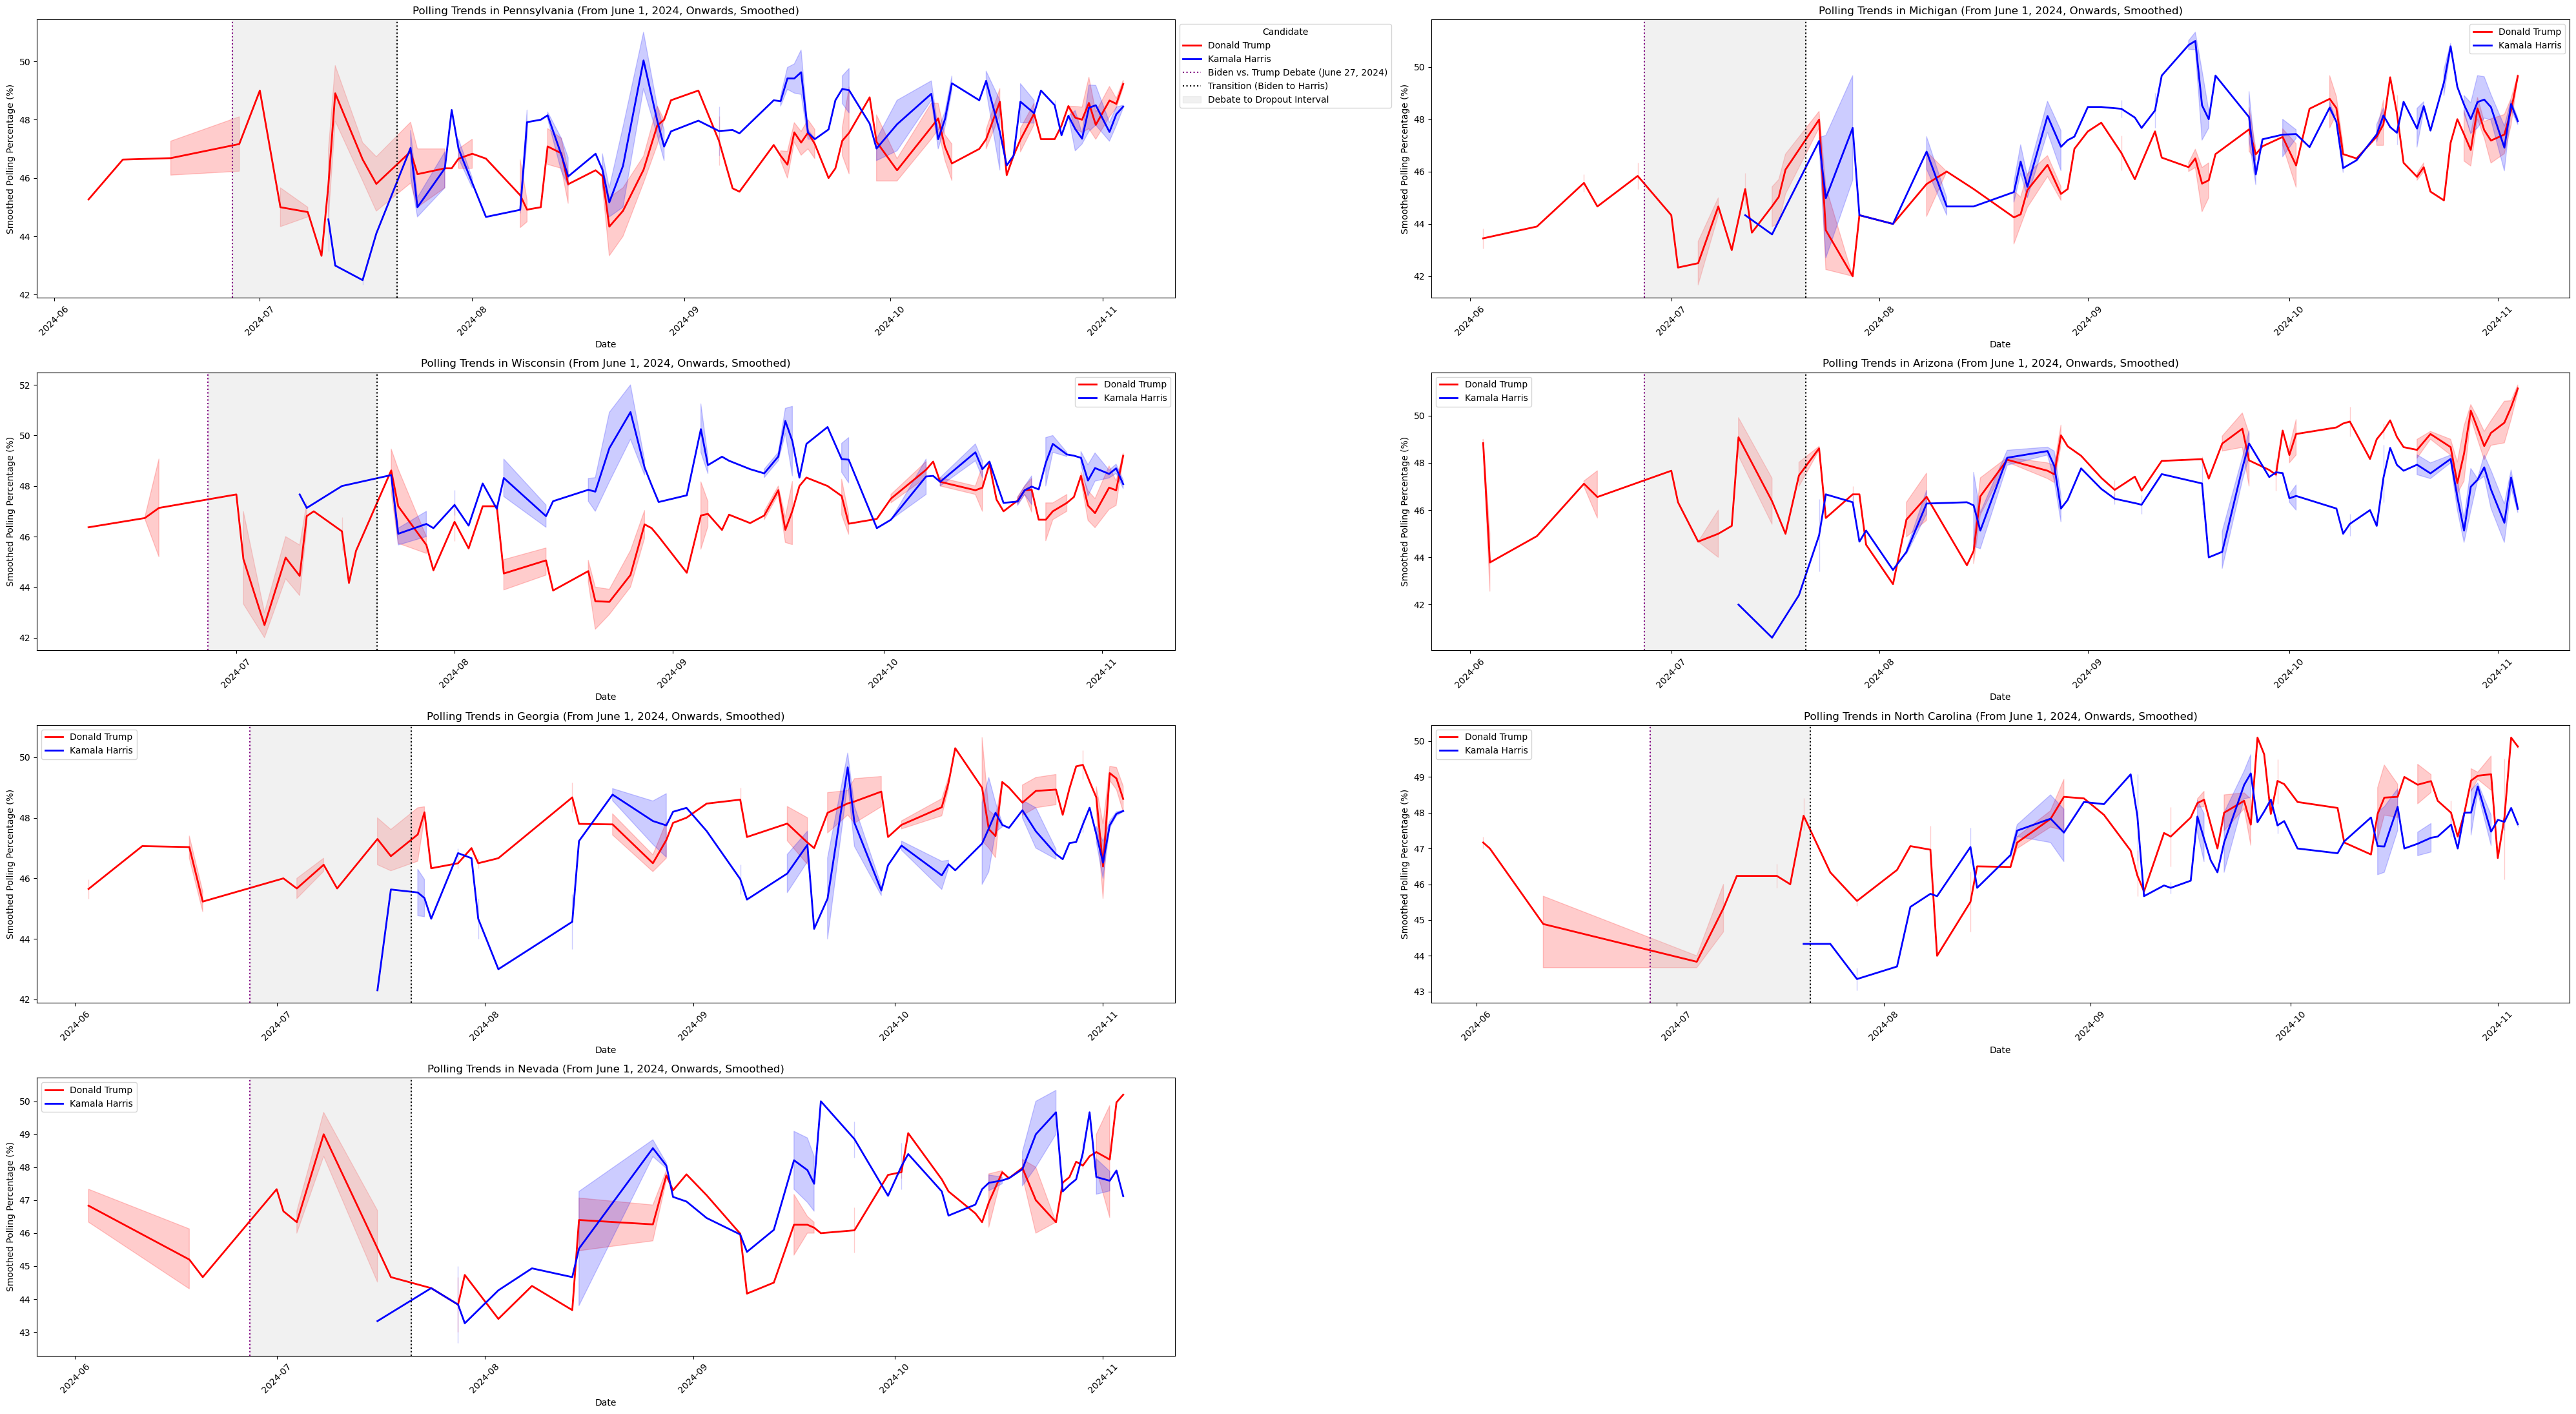

In [63]:
#applying smoothing for better visualization
filtered_polls['smoothed_pct'] = filtered_polls.groupby(['state', 'candidate_name']
)['pct'].transform(lambda x: x.rolling(window=3, min_periods=1).mean())

#plotting smoothed line charts for Trump and Harris from 06/01/24 onwards
plt.figure(figsize=(40, 22))

for i, state in enumerate(swing_states, 1):
    state_polls = filtered_polls[filtered_polls['state'] == state]
    
    if state_polls.empty:
        continue  # Skip states with no data

    plt.subplot(4, 2, i)
    
    #plotting smoothed data for Trump
    sns.lineplot(
        data=state_polls[state_polls['candidate_name'] == 'Donald Trump'],
        x='end_date', y='smoothed_pct', color='red', label='Donald Trump', linewidth=2
    )
    
    #plotting smoothed data for Harris
    sns.lineplot(
        data=state_polls[state_polls['candidate_name'] == 'Kamala Harris'],
        x='end_date', y='smoothed_pct', color='blue', label='Kamala Harris', linewidth=2
    )
    
    #adding date markers for the debate and date of Biden's dropout
    plt.axvline(pd.to_datetime('2024-06-27'), color='purple', linestyle=':', label='Biden vs. Trump Debate (June 27, 2024)')
    plt.axvline(pd.to_datetime('2024-07-21'), color='black', linestyle=':', label='Transition (Biden to Harris)')
    
    #adding interval shading between debate and dropout dates
    plt.axvspan(pd.to_datetime('2024-06-27'), pd.to_datetime('2024-07-21'), color='lightgray', alpha=0.3, label='Debate to Dropout Interval')
    
    plt.title(f'Polling Trends in {state} (From June 1, 2024, Onwards, Smoothed)')
    plt.xlabel('Date')
    plt.ylabel('Smoothed Polling Percentage (%)')
    plt.xticks(rotation=45)

    #creating legend outside the plot for the first subplot only (legend consistent across all subplots)
    if i == 1:
        plt.legend(title='Candidate', loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

## Boxplot Analysis by State

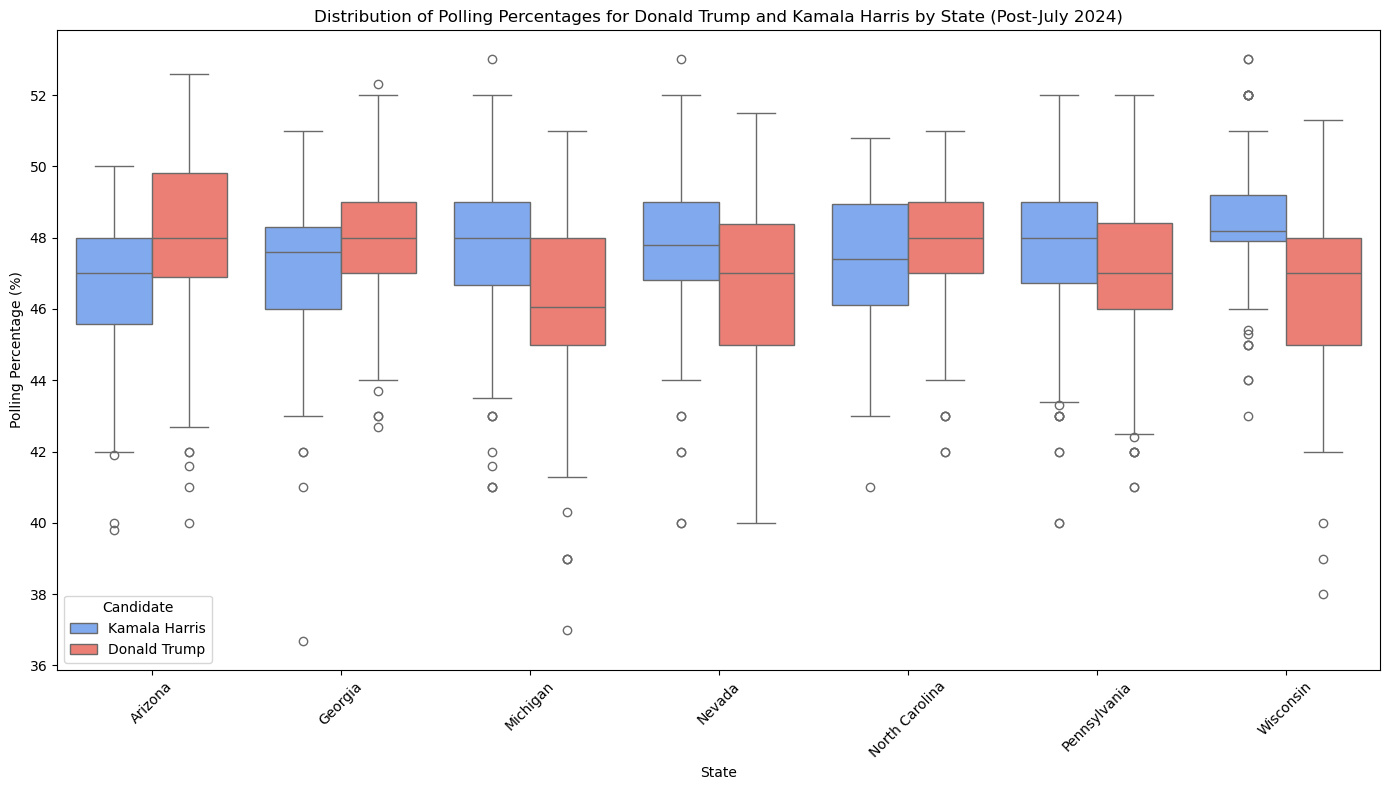

In [64]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=filtered_polls, x='state', y='pct', hue='candidate_name', palette={'Donald Trump': '#FF6F61', 'Kamala Harris': '#6FA4FF'})
plt.title('Distribution of Polling Percentages for Donald Trump and Kamala Harris by State (Post-July 2024)')
plt.xlabel('State')
plt.ylabel('Polling Percentage (%)')
plt.xticks(rotation=45)
plt.legend(title='Candidate')
plt.tight_layout()
plt.show()

## Limit Boxplot Analysis to Data From the Two Weeks Prior to Election and Onward

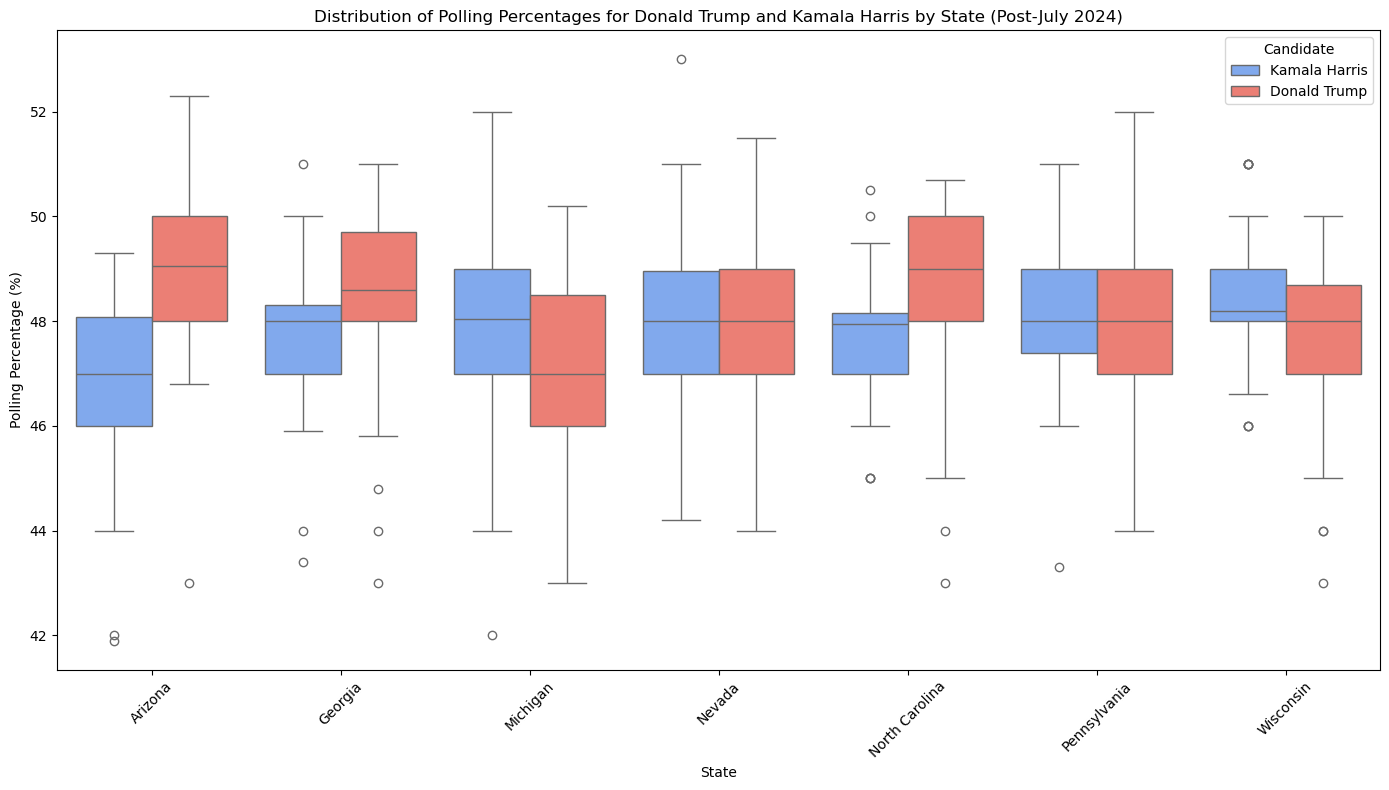

In [65]:
two_months = filtered_polls[
    (filtered_polls['end_date'] >= pd.to_datetime('2024-10-15'))]

plt.figure(figsize=(14, 8))
sns.boxplot(data=two_months, x='state', y='pct', hue='candidate_name', palette={'Donald Trump': '#FF6F61', 'Kamala Harris': '#6FA4FF'})
plt.title('Distribution of Polling Percentages for Donald Trump and Kamala Harris by State (Post-July 2024)')
plt.xlabel('State')
plt.ylabel('Polling Percentage (%)')
plt.xticks(rotation=45)
plt.legend(title='Candidate')
plt.tight_layout()
plt.show()

## Examining Distribution of Credibile Pollsters

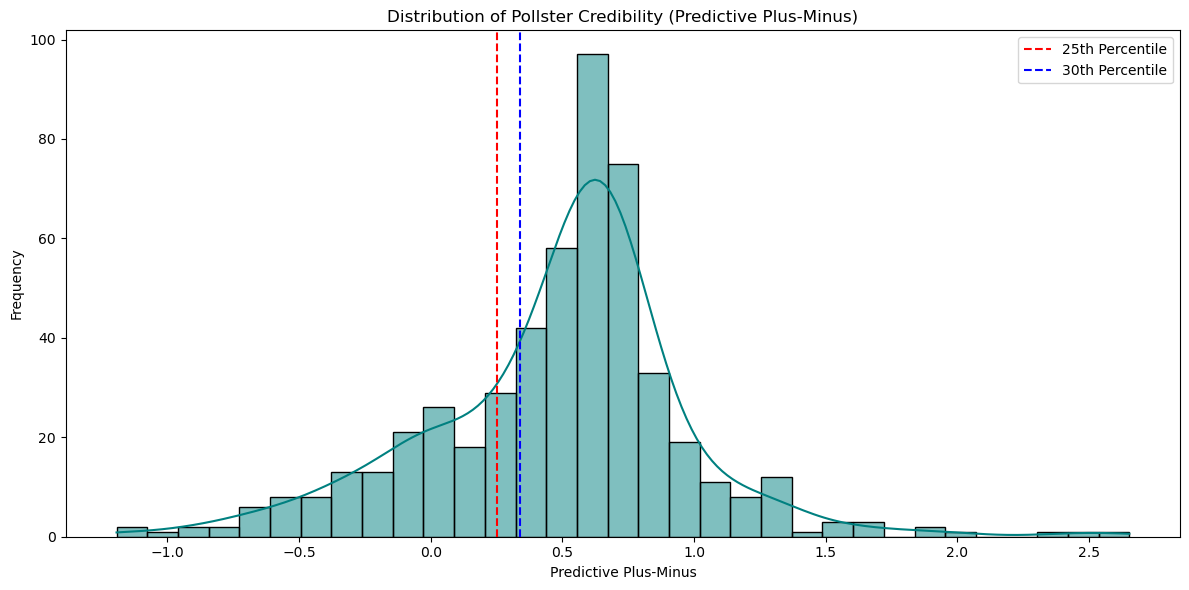

25th percentile:  0.25108863
30th percentile:  0.3381955794
50th percentile:  0.565066317


In [66]:
#plotting distribution of Predictive Plus-Minus scores for all pollsters
plt.figure(figsize=(12, 6))
sns.histplot(pollster_rankings['Predictive Plus-Minus'], kde=True, color='teal')
plt.title('Distribution of Pollster Credibility (Predictive Plus-Minus)')
plt.xlabel('Predictive Plus-Minus')
plt.ylabel('Frequency')
plt.axvline(pollster_rankings['Predictive Plus-Minus'].quantile(0.25), color='red', linestyle='--', label='25th Percentile')
plt.axvline(pollster_rankings['Predictive Plus-Minus'].quantile(0.30), color='blue', linestyle='--', label='30th Percentile')
plt.legend()
plt.tight_layout()
plt.show()

#calculating the value at the 25th percentile 
credibility_threshold_25th_percentile = pollster_rankings['Predictive Plus-Minus'].quantile(0.25)
print('25th percentile: ', credibility_threshold_25th_percentile)

#calculating the value at the 30th percentile 
credibility_threshold_30th_percentile = pollster_rankings['Predictive Plus-Minus'].quantile(0.30)
print('30th percentile: ', credibility_threshold_30th_percentile)

#calculating the value at the 50th percentile 
credibility_threshold_50th_percentile = pollster_rankings['Predictive Plus-Minus'].quantile(0.50)
print('50th percentile: ', credibility_threshold_50th_percentile)

## Re-doing Visualizations With Only Pollsters in Top 25th Percentile of Pollster Score

In [67]:
filtered_polls_with_ratings = pd.merge(
    filtered_polls,
    pollster_rankings[['Pollster', 'Predictive Plus-Minus']],
    left_on='pollster',
    right_on='Pollster',
    how='left'
)

filtered_polls_with_ratings.head()

,poll_id,pollster_id,pollster,sponsor_ids,sponsors,display_name,pollster_rating_id,pollster_rating_name,numeric_grade,pollscore,...,ranked_choice_round,hypothetical,party,answer,candidate_id,candidate_name,pct,smoothed_pct,Pollster,Predictive Plus-Minus
0,89373,1528,AtlasIntel,NaN,NaN,AtlasIntel,546,AtlasIntel,2.7,-0.8,...,NaN,False,DEM,Harris,16661,Kamala Harris,45.9,45.9,AtlasIntel,-0.762375
1,89373,1528,AtlasIntel,NaN,NaN,AtlasIntel,546,AtlasIntel,2.7,-0.8,...,NaN,False,REP,Trump,16651,Donald Trump,51.0,51.0,AtlasIntel,-0.762375
2,89373,1528,AtlasIntel,NaN,NaN,AtlasIntel,546,AtlasIntel,2.7,-0.8,...,NaN,False,DEM,Harris,16661,Kamala Harris,46.5,46.2,AtlasIntel,-0.762375
3,89373,1528,AtlasIntel,NaN,NaN,AtlasIntel,546,AtlasIntel,2.7,-0.8,...,NaN,False,REP,Trump,16651,Donald Trump,51.6,51.3,AtlasIntel,-0.762375
4,89374,1528,AtlasIntel,NaN,NaN,AtlasIntel,546,AtlasIntel,2.7,-0.8,...,NaN,False,DEM,Harris,16661,Kamala Harris,48.2,48.2,AtlasIntel,-0.762375


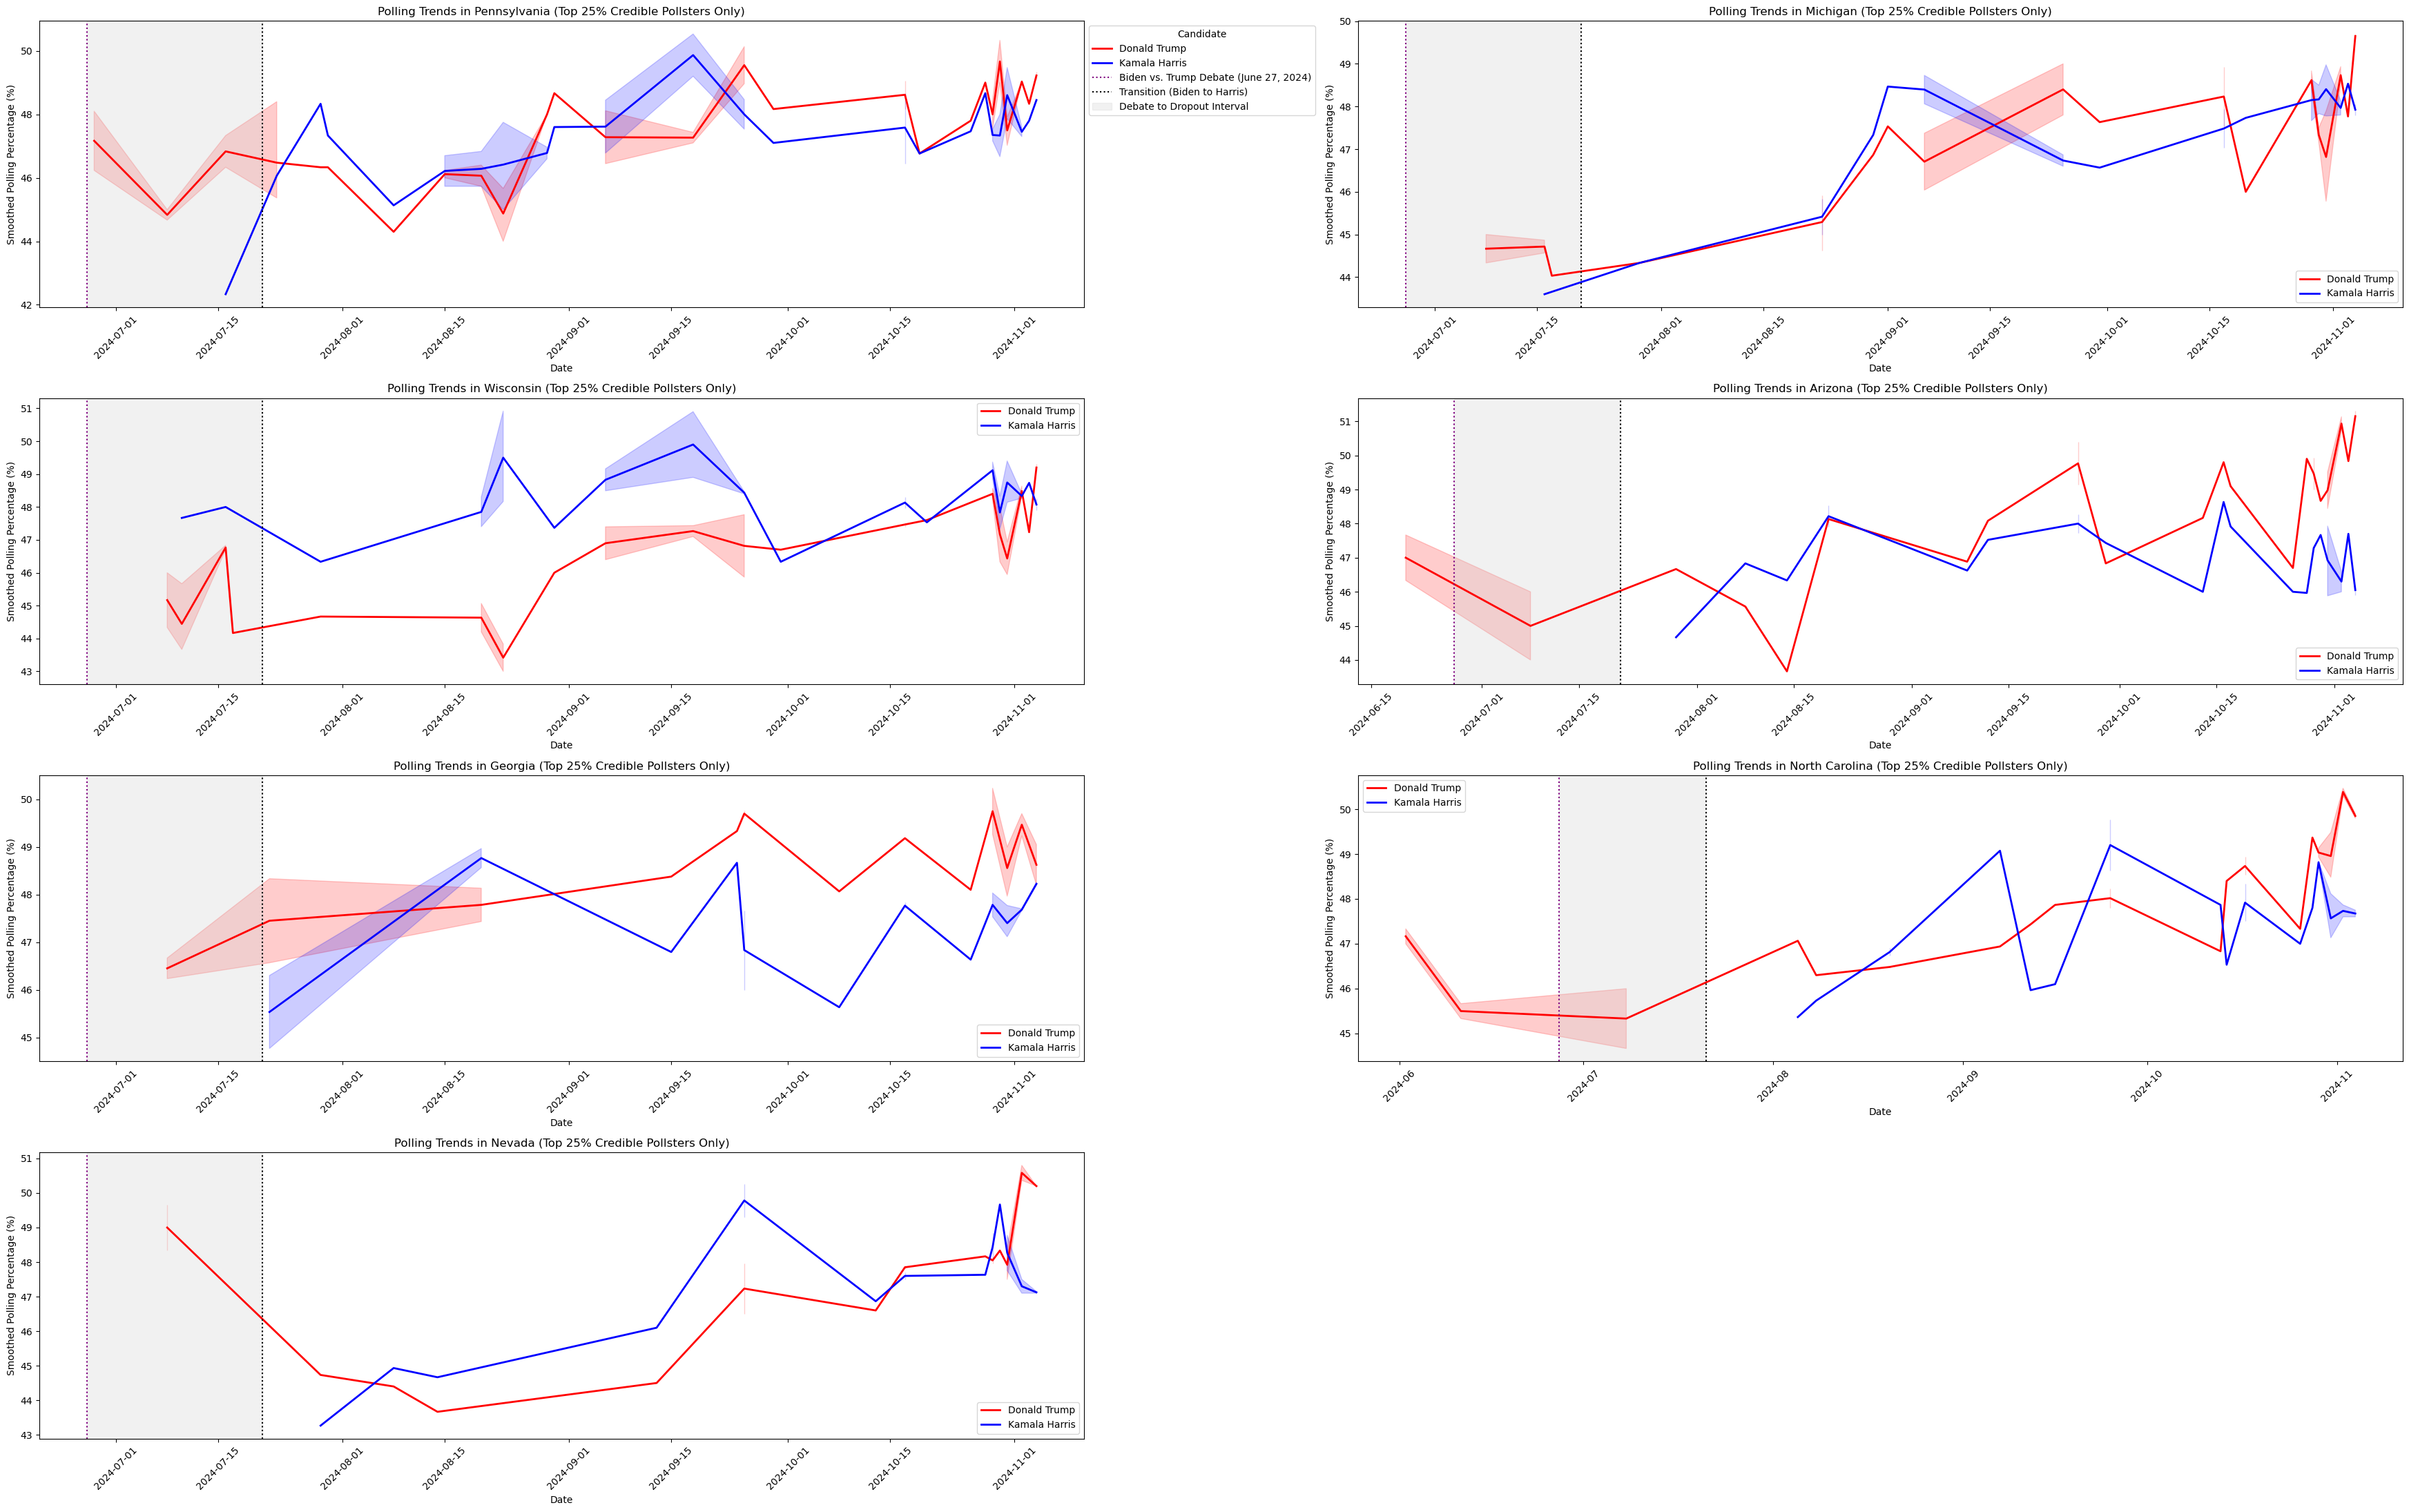

In [68]:
#filtering data to only include credible pollsters based on the 25th percentile threshold
credible_polls_25th = filtered_polls_with_ratings[
    filtered_polls_with_ratings['Predictive Plus-Minus'] < credibility_threshold_25th_percentile
]

#plotting smoothed line charts for Trump and Harris with highly credible pollsters only
plt.figure(figsize=(35, 22))

for i, state in enumerate(swing_states, 1):
    state_polls = credible_polls_25th[credible_polls_25th['state'] == state]
    
    if state_polls.empty:
        continue  # Skip states with no data

    plt.subplot(4, 2, i)
    
    #plotting smoothed data for Trump
    sns.lineplot(
        data=state_polls[state_polls['candidate_name'] == 'Donald Trump'],
        x='end_date', y='smoothed_pct', color='red', label='Donald Trump', linewidth=2
    )
    
    #plotting smoothed data for Harris
    sns.lineplot(
        data=state_polls[state_polls['candidate_name'] == 'Kamala Harris'],
        x='end_date', y='smoothed_pct', color='blue', label='Kamala Harris', linewidth=2
    )
    
    #adding date markers for the debate and date of Biden's dropout
    plt.axvline(pd.to_datetime('2024-06-27'), color='purple', linestyle=':', label='Biden vs. Trump Debate (June 27, 2024)')
    plt.axvline(pd.to_datetime('2024-07-21'), color='black', linestyle=':', label='Transition (Biden to Harris)')
    
    #adding interval shading between debate and dropout dates
    plt.axvspan(pd.to_datetime('2024-06-27'), pd.to_datetime('2024-07-21'), color='lightgray', alpha=0.3, label='Debate to Dropout Interval')
    
    plt.title(f'Polling Trends in {state} (Top 25% Credible Pollsters Only)')
    plt.xlabel('Date')
    plt.ylabel('Smoothed Polling Percentage (%)')
    plt.xticks(rotation=45)

    #adding legend for first subplot only
    if i == 1:
        plt.legend(title='Candidate', loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()


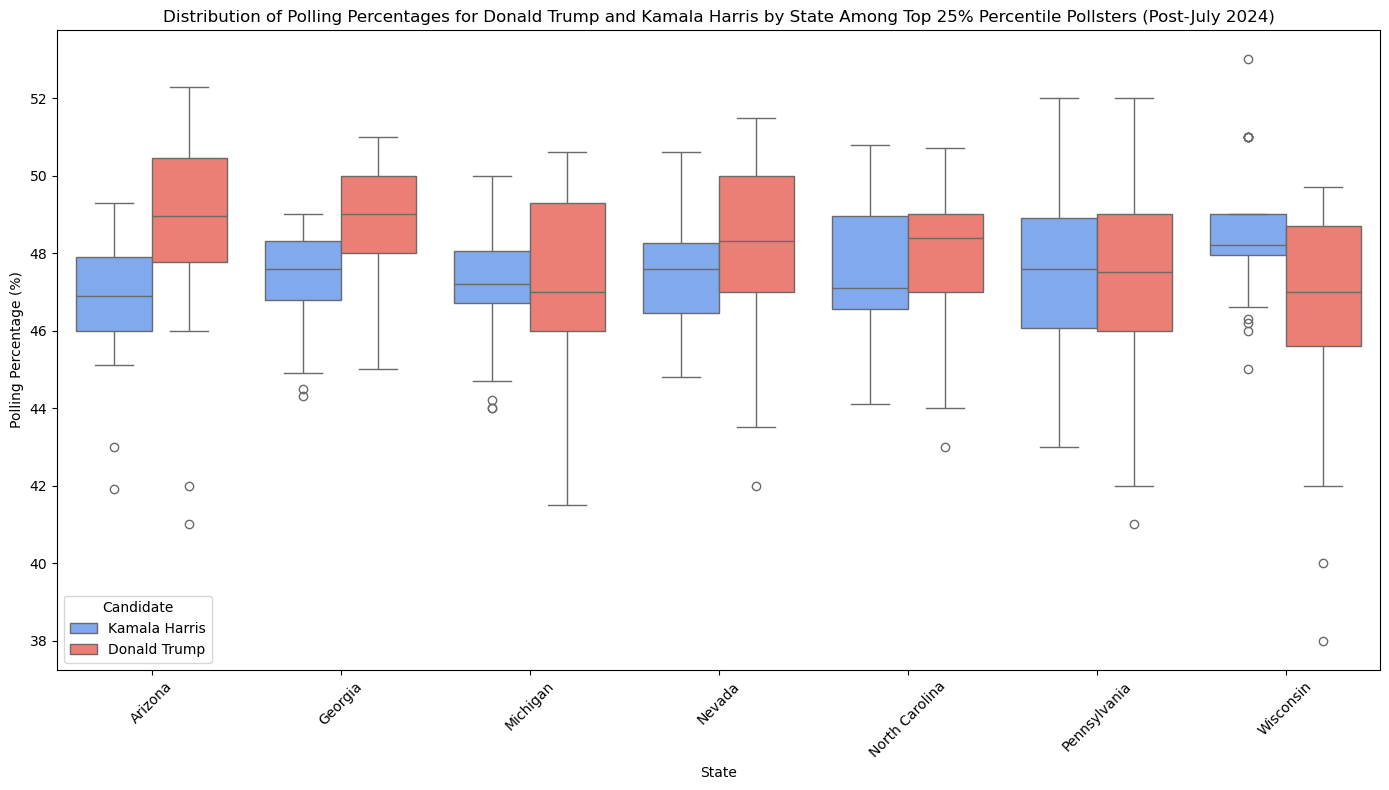

In [69]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=credible_polls_25th, x='state', y='pct', hue='candidate_name', palette={'Donald Trump': '#FF6F61', 'Kamala Harris': '#6FA4FF'})
plt.title('Distribution of Polling Percentages for Donald Trump and Kamala Harris by State Among Top 25% Percentile Pollsters (Post-July 2024)')
plt.xlabel('State')
plt.ylabel('Polling Percentage (%)')
plt.xticks(rotation=45)
plt.legend(title='Candidate')
plt.tight_layout()
plt.show()

It's difficult to come to many conclusions other than the fact that the race appears to be extremely close in the swing states. It does seem relatively clear, however, based on the visualizations and external news and analyses that Trump appears to have the advantage in the state of Arizona.